# Graph Theroy in Python

This is a tutorial (taken from https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial) is on graph theory using python and networkx package.

## The problem

To find the shortest path between houses (nodes) that covers all the roads (edges) for a postal worker to travel. Roads can be traversed more than once however it must be done in the shortest distance (while covering all the roads).

## Graphs an Introduction.

Graphs (denoted by G):

- Structures that map relations between objects.
- Objects are commonly called nodes, vertecies or points
- Connections between nodes are called, edges, arcs or links.
- Graphs can be un-directional or bi-directional (A <--> B) or directed graphs (A --> B)
- Can be weighted or unweighted (weights assign to edges or not)

Size and order:

- The size of G is the number of nodes
- The Order of G is the number if edges.
- Maximum order is n(n-1)/2 and this is a complete graph

Weights

- A numerical value assigned to as a label to an edge of a graph. 

Degree

- The number of nodes/verticies connected to a node.

Geodesics (shortest path)
- The shortest distance between two nodes.

Classical Centralities:

- Degree centrality: The number of links held by a node (how well connected it is)
- Closeness centrality: How close a node is to all other nodes in the network
- Betweeness centrality: The number of times a node lies on the shortest path between other nodes.  
- Eigenvector centrality: A measure of influence of a node in a network (the sum of its connections to other nodes weighted by centrality)

Other Centralities:
- Strength Centrality: The sum of the weights of a node   
- Expected influence centrality: Similar to strength centrality but only includes positive weights.
- Bridge strength centrality: A node's total connectivity with other nodes in a subgraph (or nodes that belong to another category, i.e if using metal health then nodes of another disorder)
- Bridge betweenness centrality: The number of times a node lies on the shortest path between any two nodes from two distict subgraphs (or nodes that belong to another category, i.e if using metal health then nodes of another disorder)
- Bridge Closeness centrality: The average distance from a node to all nodes outside of the subgraph (or nodes that belong to another category, i.e if using metal health then nodes of another disorder)

Clustering:
- Clustering co-effient is a measure of the degree to which nodes in a graph cluster together

Small World network
- A graph in which most nodes are not neighbors of one another. 
- Most nodes can be reached from every other node by a small number of hops or steps. 
- The shortest-path distance between nodes increases sufficiently slowly as a function of the number of nodes in the network.  


### Further reading 

http://www.stats.ox.ac.uk/~snijders/D1pm_Graph_theory_basics.pdf - Stats from oxford uni

https://findatwiki.com/Weights_(graph_theory) - appendix of terms

https://cogentoa.tandfonline.com/doi/full/10.1080/00273171.2019.1614898 - Bridge Centrality: A Network Approach to Understanding Comorbidity

https://psych-networks.com/expected-influence-new-centrality-metric-robinaugh-et-al-2016/ - Expected influence: a new centrality metric by Robinaugh et al. 2016

## The Code

1. Import the packages
2. Get the data. A list of nodes isn't always needed as networkx can work out nodes from the edges (in this case a node list is provided)
3. Create an empty graph and add edges/nodes.
4. Visulaise the graph
5. Implement the CPP alogrithm to find the shortest path between nodes utilizing all the paths. 


In [37]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
edgelist.head()

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


In [4]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')
nodelist.head()

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


create an empty graph then loop through the rows of the edgelist and node list adding each edge and its corresponding attributes to the graph.

In [5]:
graph = nx.Graph()

In [6]:
for index, edges in edgelist.iterrows():
    graph.add_edge(edges[0],edges[1], attr_dict=edges[2:].to_dict())

~~~
edges[0] = the first node 

edges[1] = the second node

edges[2:].to_dict() = a dictionary with all the details about the edges.
~~~
We also do the same for the node list (however unlike the tutorial we need to use graph.nodes which is just a standard dictionary)

In [7]:
for index, node in nodelist.iterrows():
    graph.nodes[node['id']].update(node[1:].to_dict())

Inspect the graph output 

~~~
print(graph.edges(data=True))
print(graph.nodes(data=True))
~~~

This prints out all the data while

~~~
graph[node in graph]
~~~

only prints out selected node.

In [8]:
print(graph['v_rs'])

{'rs_end_north': {'attr_dict': {'trail': 'rs', 'distance': 0.3, 'color': 'red', 'estimate': 0}}, 'b_rs': {'attr_dict': {'trail': 'rs', 'distance': 0.21, 'color': 'red', 'estimate': 0}}, 'v_bv': {'attr_dict': {'trail': 'v', 'distance': 0.52, 'color': 'violet', 'estimate': 0}}, 'v_end_east': {'attr_dict': {'trail': 'v', 'distance': 0.54, 'color': 'violet', 'estimate': 0}}}


In [9]:
graph.nodes(data=True)

NodeDataView({'rs_end_north': {'X': 1772, 'Y': 172}, 'v_rs': {'X': 1793, 'Y': 484}, 'b_rs': {'X': 1747, 'Y': 700}, 'g_rs': {'X': 1676, 'Y': 775}, 'w_rs': {'X': 1646, 'Y': 947}, 'o_rs': {'X': 1724, 'Y': 1148}, 'y_rs': {'X': 1805, 'Y': 1246}, 'rs_end_south': {'X': 1865, 'Y': 1598}, 'rc_end_north': {'X': 867, 'Y': 618}, 'v_rc': {'X': 1288, 'Y': 934}, 'b_rc': {'X': 1311, 'Y': 979}, 'g_rc': {'X': 1451, 'Y': 1020}, 'o_rc': {'X': 1498, 'Y': 1153}, 'w_rc': {'X': 1491, 'Y': 1352}, 'y_rc': {'X': 1429, 'Y': 1491}, 'rc_end_south': {'X': 1450, 'Y': 1800}, 'rt_end_north': {'X': 681, 'Y': 850}, 'v_rt': {'X': 802, 'Y': 1115}, 'tt_rt': {'X': 833, 'Y': 1273}, 'b_rt': {'X': 835, 'Y': 1309}, 'g_rt': {'X': 908, 'Y': 1378}, 'o_rt': {'X': 927, 'Y': 1427}, 'w_rt': {'X': 926, 'Y': 1490}, 'y_rt': {'X': 977, 'Y': 1666}, 'rt_end_south': {'X': 944, 'Y': 1837}, 'rh_end_north': {'X': 205, 'Y': 1472}, 'v_rh': {'X': 415, 'Y': 1350}, 'b_rh': {'X': 525, 'Y': 1380}, 'rh_end_tt_1': {'X': 558, 'Y': 1430}, 'rh_end_tt_2': {'

In [10]:
print(f'Number of edges in graph {graph.number_of_edges()}')
print(f'Number of edges in graph {graph.number_of_nodes()}')

Number of edges in graph 123
Number of edges in graph 77


### Visualise the graph

1. Manipulate nodes to reflect actual geometery (if geometery doesn't matter then can leave it). In this example the X axis and the Y axis to given a co-ordinate
2. The edges also have a colour attribute with them to make the graph colourful.

In [12]:
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in graph.nodes(data=True)}
node_positions

{'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'w_rs': (1646, -947),
 'o_rs': (1724, -1148),
 'y_rs': (1805, -1246),
 'rs_end_south': (1865, -1598),
 'rc_end_north': (867, -618),
 'v_rc': (1288, -934),
 'b_rc': (1311, -979),
 'g_rc': (1451, -1020),
 'o_rc': (1498, -1153),
 'w_rc': (1491, -1352),
 'y_rc': (1429, -1491),
 'rc_end_south': (1450, -1800),
 'rt_end_north': (681, -850),
 'v_rt': (802, -1115),
 'tt_rt': (833, -1273),
 'b_rt': (835, -1309),
 'g_rt': (908, -1378),
 'o_rt': (927, -1427),
 'w_rt': (926, -1490),
 'y_rt': (977, -1666),
 'rt_end_south': (944, -1837),
 'rh_end_north': (205, -1472),
 'v_rh': (415, -1350),
 'b_rh': (525, -1380),
 'rh_end_tt_1': (558, -1430),
 'rh_end_tt_2': (550, -1608),
 'o_rh': (585, -1674),
 'rh_end_tt_3': (573, -1707),
 'rh_end_tt_4': (695, -1767),
 'y_rh': (717, -1852),
 'rh_end_south': (721, -1925),
 'rd_end_north': (185, -1561),
 'v_rd': (258, -1684),
 'b_rd': (268, -1744),
 'rd_end_south': (2

In [28]:
edge_colours = [edge[2]['attr_dict']['color'] for edge in graph.edges(data=True)]

In [50]:
labels = dict(zip([index for index in nodelist.index],[id for id in nodelist['id']]))
graph.nodes(data=False)

NodeView(('rs_end_north', 'v_rs', 'b_rs', 'g_rs', 'w_rs', 'o_rs', 'y_rs', 'rs_end_south', 'rc_end_north', 'v_rc', 'b_rc', 'g_rc', 'o_rc', 'w_rc', 'y_rc', 'rc_end_south', 'rt_end_north', 'v_rt', 'tt_rt', 'b_rt', 'g_rt', 'o_rt', 'w_rt', 'y_rt', 'rt_end_south', 'rh_end_north', 'v_rh', 'b_rh', 'rh_end_tt_1', 'rh_end_tt_2', 'o_rh', 'rh_end_tt_3', 'rh_end_tt_4', 'y_rh', 'rh_end_south', 'rd_end_north', 'v_rd', 'b_rd', 'rd_end_south', 'v_end_west', 'b_v', 'v_bv', 'v_end_east', 'bstub_w', 'b_end_west', 'rd_end_south_dupe', 'b_rd_dupe', 'b_tt_1', 'b_bw', 'b_tt_2', 'b_tt_3', 'b_bv', 'b_g', 'b_w', 'b_gy2', 'b_o', 'b_y', 'b_end_east', 'w_tt', 'w_bw', 'g_w', 'o_w_1', 'w_gy1', 'o_w_2', 'w_gy2', 'park_east', 'g_gy1', 'g_gy2', 'o_y_tt_end_west', 'o_tt', 'o_gy1', 'o_gy2', 'y_gy1', 'y_gy2', 'nature_end_west', 'b_tt_2_dupe', 'b_tt_3_dupe'))

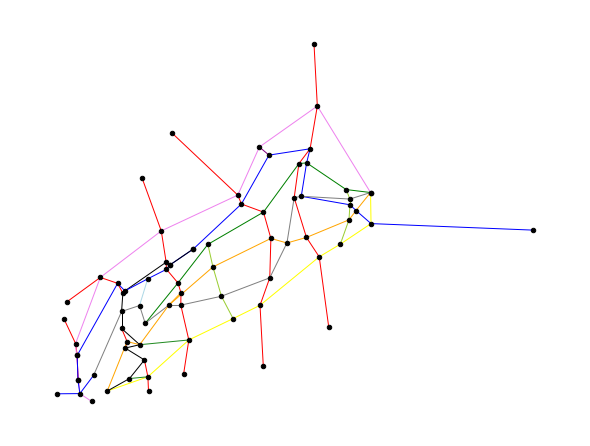

In [52]:
plt.figure(figsize=(8,6))
nx.draw(graph, pos=node_positions, node_size=20, edge_color=edge_colours, node_color='black')